# EG24 CITE-seq and flow cytometry comparisons

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
from ridgeplot import ridgeplot

import sklearn.mixture

import warnings

warnings.filterwarnings('ignore')

Global seed set to 0
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


## Preparing files

In [2]:
#raw protein data, all datasets, raw + CLR and DSB normalized

adata = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/adata_easi_norm.h5ad')

adata.shape

(121340, 8051)

In [145]:
adata

AnnData object with n_obs × n_vars = 121340 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    obsp: 'connectivities', 'distances'

In [3]:
#select sample

adata_sample=adata[adata.obs['eg_code'] == 'EG34']

In [4]:
#selecting only NKT cells

eg_nkt=adata_sample[adata_sample.obs['cell_type'] == 'NKT']

eg_nkt.obs['cell_type']

AAACCTGCAAAGCGGT-1-148    NKT
AAACCTGCAGAGCCAA-1-148    NKT
AAACGGGTCAAGAAGT-1-148    NKT
AAAGATGAGCACGCCT-1-148    NKT
AAAGATGAGGGTTCCC-1-148    NKT
                         ... 
TTTCCTCCATTCTCAT-1-148    NKT
TTTGCGCAGATAGGAG-1-148    NKT
TTTGCGCGTATTCTCT-1-148    NKT
TTTGGTTTCAGCACAT-1-148    NKT
TTTGGTTTCCGCATAA-1-148    NKT
Name: cell_type, Length: 1011, dtype: category
Categories (1, object): ['NKT']

In [124]:
#convert excel to csv (flow data)

#read_file = pd.read_excel (r'/Users/tiinatuononen/Desktop/Thesis/Project/data/cell_pop_easi.xlsx')
#read_file.to_csv (r'/Users/tiinatuononen/Desktop/Thesis/Project/data/flow_cellpop_easi1.csv', index = False, header=True)

In [138]:
#get flow data

flow= pd.read_csv('/Users/tiinatuononen/Desktop/Thesis/Project/data/flow_cellpop_easi1.csv')

In [139]:
flow

,EG_code,lymphocyte,monocyte,granulopoiesis,erythropoiesis,blast_from_CD45pos,Blymphoid,Tlymphoid,Nklympoid
0,EG21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EG24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EG22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EG23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,EG25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,EG26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,EG27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,EG28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,EG29,5.0,2.0,70.0,8.0,10,NaN,NaN,NaN
9,"EG5,EG7",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#Cell types offered by new_cell_type

adata.obs['new_cell_type'].unique().tolist()

['NK',
 'non-leukemic',
 'preleukemic',
 'non-leukemic?',
 nan,
 'leukemic',
 'leukemic?',
 'doublets?',
 'unknown',
 '0',
 'preleukemic?']

In [14]:
#cell type annotations offered by cell_type

adata.obs['cell_type'].unique().tolist()

['NKT',
 'non-leukemic',
 'preleukemic',
 'non-leukemic?',
 nan,
 'leukemic',
 'leukemic?',
 'doublets?',
 'unknown',
 '0',
 'preleukemic?']

## % of NKT cells



For samples EG34-EG39, EG55 and EG57 we have percentages of different lymhoid cell populations (Blymphoid, Tlymphoid, Nklymphoid). In EG36 no NK cells. 

In [136]:
flow

,EG_code,lymphocyte,monocyte,granulopoiesis,erythropoiesis,blast_from_CD45pos,Blymphoid,Tlymphoid,Nklympoid
0,EG21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EG24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EG22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EG23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,EG25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,EG26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,EG27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,EG28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,EG29,5.0,2.0,70.0,8.0,10,NaN,NaN,NaN
9,"EG5,EG7",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


EG34
 % Flow cytometry: 13    89.0
dtype: float64
 % Cite-seq: 90.91726618705036


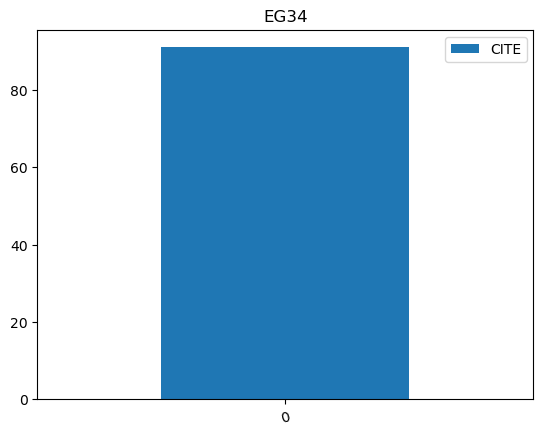

EG35
 % Flow cytometry: 15    88.0
dtype: float64
 % Cite-seq: 56.03290676416819


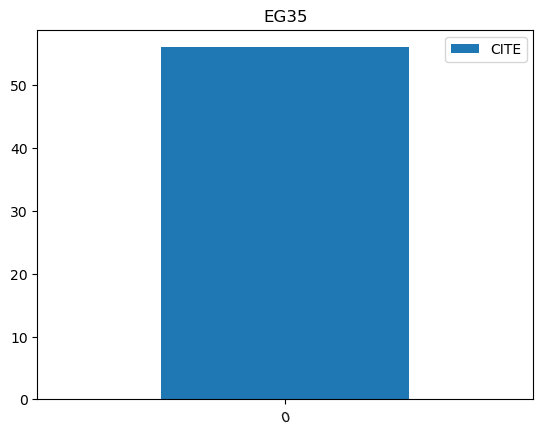

EG38
 % Flow cytometry: 16    79.0
dtype: float64
 % Cite-seq: 4.992657856093979


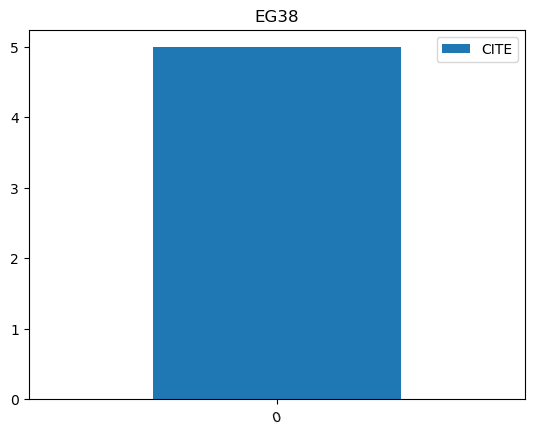

EG39
 % Flow cytometry: 17    88.0
dtype: float64
 % Cite-seq: 9.862511457378552


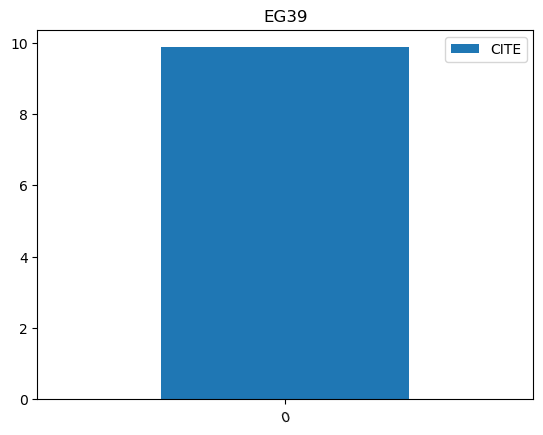

EG55
 % Flow cytometry: 38    93.0
dtype: float64
 % Cite-seq: 66.46145610278373


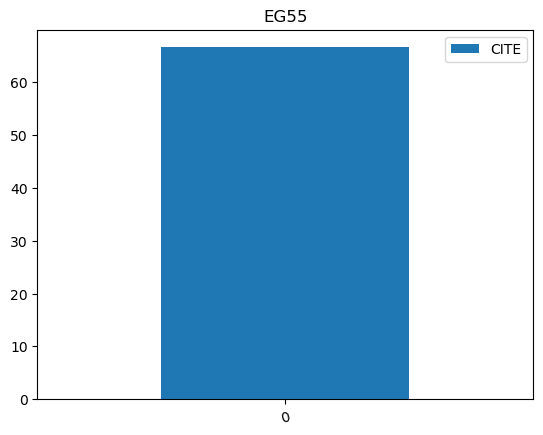

EG57
 % Flow cytometry: 40    100.0
dtype: float64
 % Cite-seq: 55.05896958410925


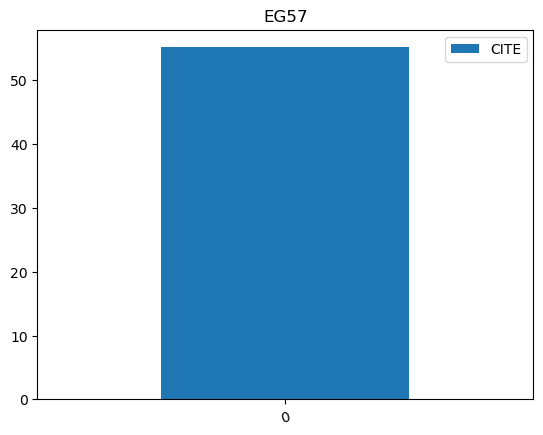

In [144]:
samples = ['EG34', 'EG35', 'EG38', 'EG39', 'EG55', 'EG57']
col_list = ['Tlymphoid', 'Nklympoid']

for sample in samples:
    egflow=flow[flow['EG_code'] == sample].dropna(axis=1)
    percentage_nkt_flow = egflow[col_list].sum(axis=1)
    egcite = adata[adata.obs['POOL'] == sample]
    n_cells = len(egcite.obs['cell_type'])
    n_nkt = len(egcite[egcite.obs['cell_type'] == 'NKT'])
    percentage_nkt_cite = n_nkt/n_cells * 100   #here we should calculate the % of nkt cells/ all lymphoid cells
    print(sample)
    print(" % Flow cytometry:", percentage_nkt_flow)
    print(" % Cite-seq:", percentage_nkt_cite)
    
    
    #dataframe from results
    
    all_data = {"Flow":[percentage_nkt_flow],
                "CITE": [percentage_nkt_cite],
                };
    
    all_data= pd.DataFrame(data=all_data);
    all_data.plot.bar(rot=15, title=sample);
    
    plt.show()


In [68]:
all_data

,Flow,CITE
0,40 100.0 dtype: float64,55.05897


In [73]:
percentage_nkt_flow

40    100.0
dtype: float64

In [53]:
eg57=adata[adata.obs['eg_code'] == 'EG57']

In [59]:
eg57

View of AnnData object with n_obs × n_vars = 1611 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    obsp: 'connectivities', 'distances'

In [57]:
eg57_nk = eg57[eg57.obs['cell_type'] == 'NKT']

In [58]:
eg57_nk

View of AnnData object with n_obs × n_vars = 887 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    obsp: 'connectivities', 'distances'

In [60]:
887/1611


0.5505896958410925

In [18]:
#flow results for selected sample, dropping empty columns

egflow=flow[flow['EG_code'] == 'EG34'].dropna(axis=1)

egflow

,EG_code,lymphocyte,Blymphoid,Tlymphoid,Nklympoid
13,EG34,100.0,11.0,72.0,17.0


In [33]:
col_list = ['Tlymphoid', 'Nklympoid']

percentage_nkt = egflow[col_list].sum(axis=1)

In [142]:
percentage_nkt

40    100.0
dtype: float64